In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

train = pd.read_csv("/content/drive/MyDrive/ML_study/영화_관객수/data/movies_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML_study/영화_관객수/data/movies_test.csv")

## EDA

**목적**: 주어진 데이터를 바탕으로 영화의 관객수를 예측 해보세요!

변수 소개

* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수


[대회 링크](https://dacon.io/competitions/open/235536/data)

평가 산식 : RMSE

사용 가능 언어 : Python, R

In [3]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [7]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [8]:
cols = train.select_dtypes(include='O').columns
train[cols].describe()

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


In [9]:
test[cols].describe()

,title,distributor,genre,release_time,screening_rat,director
count,243,243,243,243,243,243
unique,243,93,12,182,4,220
top,용서는 없다,CJ 엔터테인먼트,드라마,2015-09-10,청소년 관람불가,조성규
freq,1,31,78,4,93,3


In [10]:
train.shape, test.shape

((600, 12), (243, 11))

title에 관한 컬럼은 모든 데이터에 대해 unique 한 컬럼으로 삭제


결측값 확인


In [11]:
train.isnull().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


dir_prev_bfnum :해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

해당 컬럼만 결측 값 존재 - 컬럼삭제, 대체로 처리


In [12]:
test.isnull().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,136
dir_prev_num,0
num_staff,0


dir_prev_bfnum :해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

해당 컬럼만 결측 값 존재

In [13]:
print("train 데이터 dir_prev_bfnum 결측값의 비율: ",train['dir_prev_bfnum'].isnull().sum()/len(train))
print("test 데이터 dir_prev_bfnum 결측값의 비율: ",round(test['dir_prev_bfnum'].isnull().sum()/len(test),2))


train 데이터 dir_prev_bfnum 결측값의 비율:  0.55
test 데이터 dir_prev_bfnum 결측값의 비율:  0.56


결측값이 반이상을 차지

### 시각화

In [14]:
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [15]:
train_copy = train.copy()
train_copy = train_copy.drop('title',axis=1)

In [16]:
cols_o = train_copy.select_dtypes(exclude='O')
cols_o

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,96,NaN,0,91,2,23398
1,130,1161602.50,2,387,3,7072501
2,123,220775.25,4,343,4,6959083
3,101,23894.00,2,20,6,217866
4,108,1.00,1,251,2,483387
...,...,...,...,...,...,...
595,111,3833.00,1,510,7,1475091
596,127,496061.00,1,286,6,1716438
597,99,NaN,0,123,4,2475
598,102,NaN,0,431,4,2192525


line plot

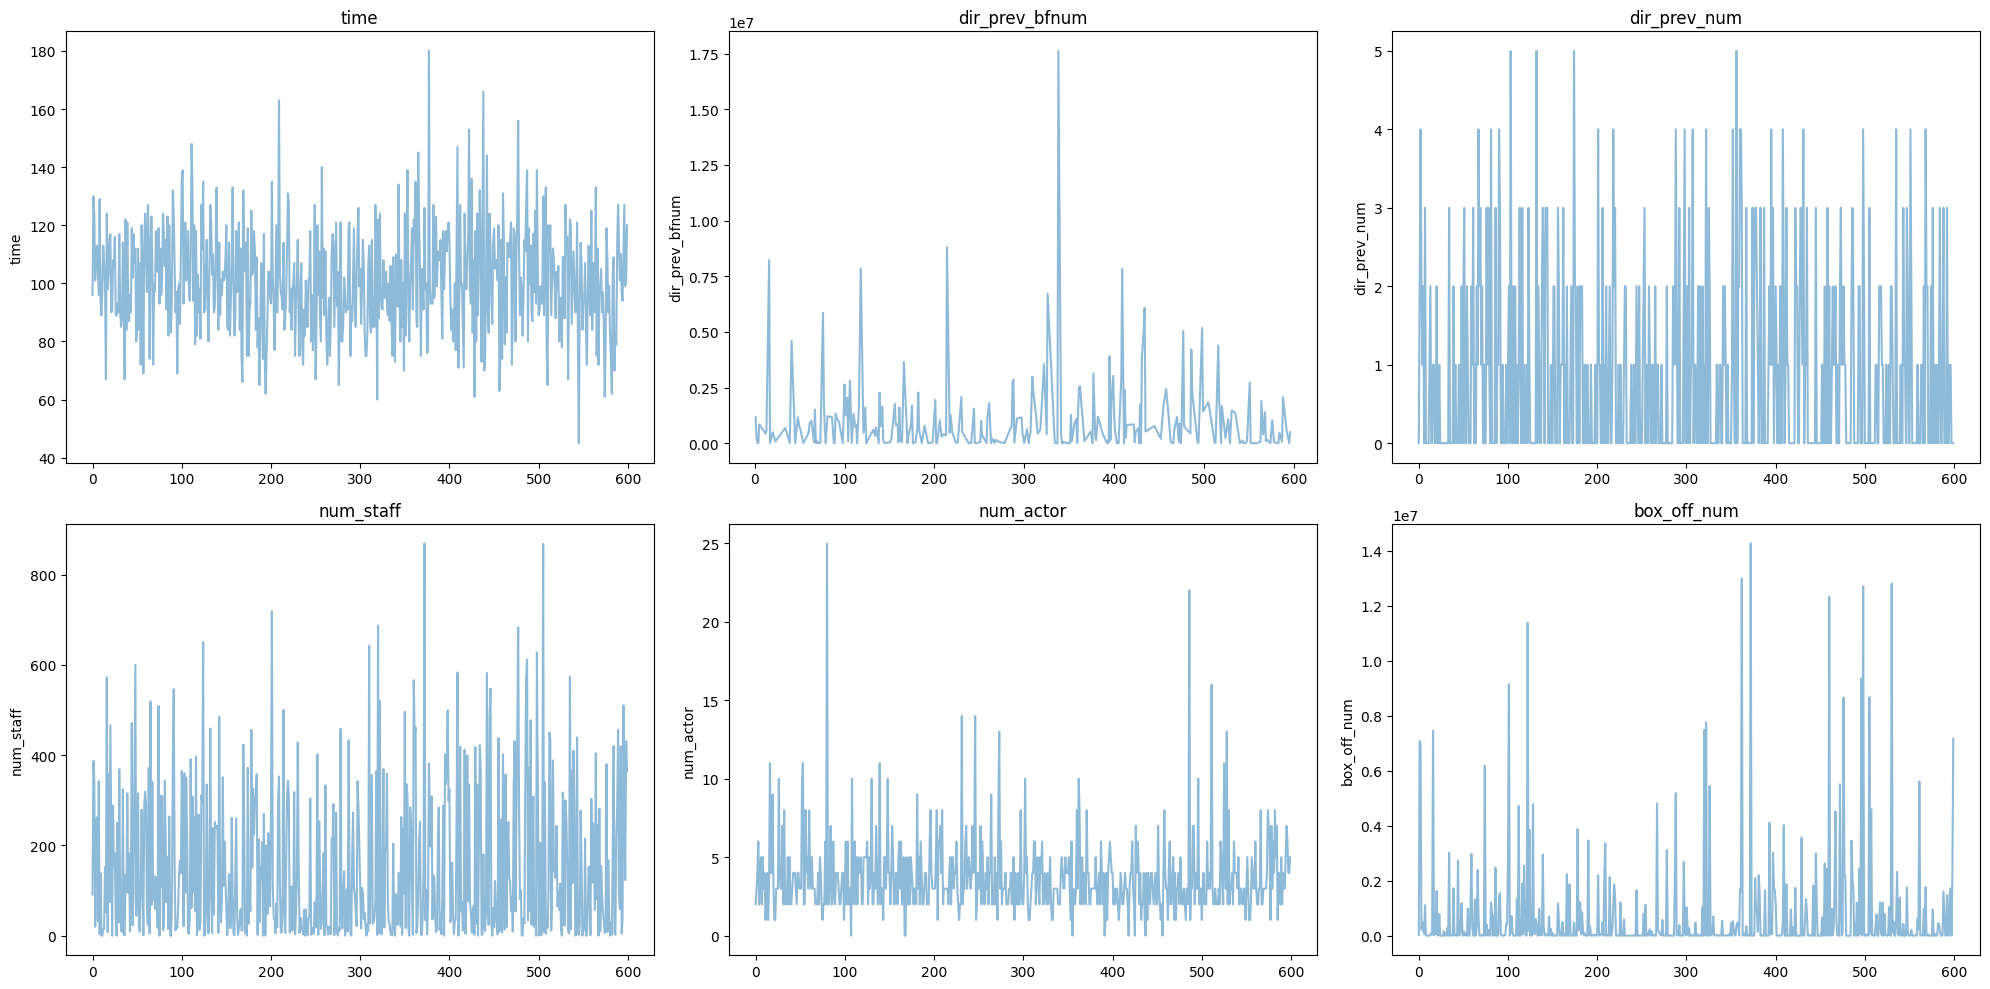

In [17]:
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 선그래프 생성
cols_i = train_copy.select_dtypes(exclude='O')
for i, col in enumerate(cols_i.columns):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=cols_i[col], alpha=0.5)  # lineplot 사용
    plt.title(col)

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


히트맵

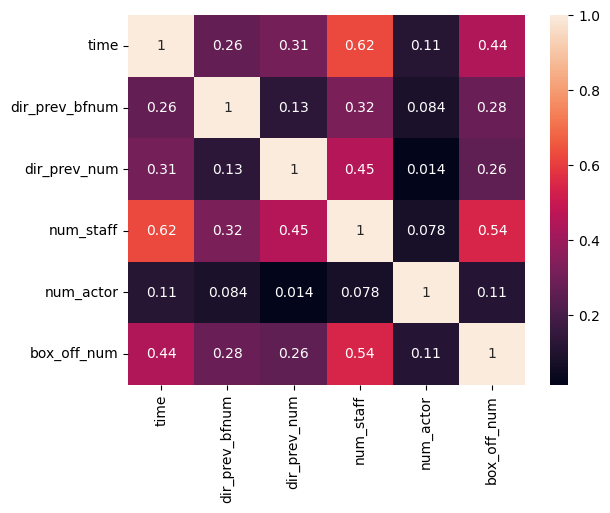

In [18]:
cols_i = train_copy.select_dtypes(exclude='O')
corr = cols_i.corr()
sns.heatmap(corr,annot=True);

산점도


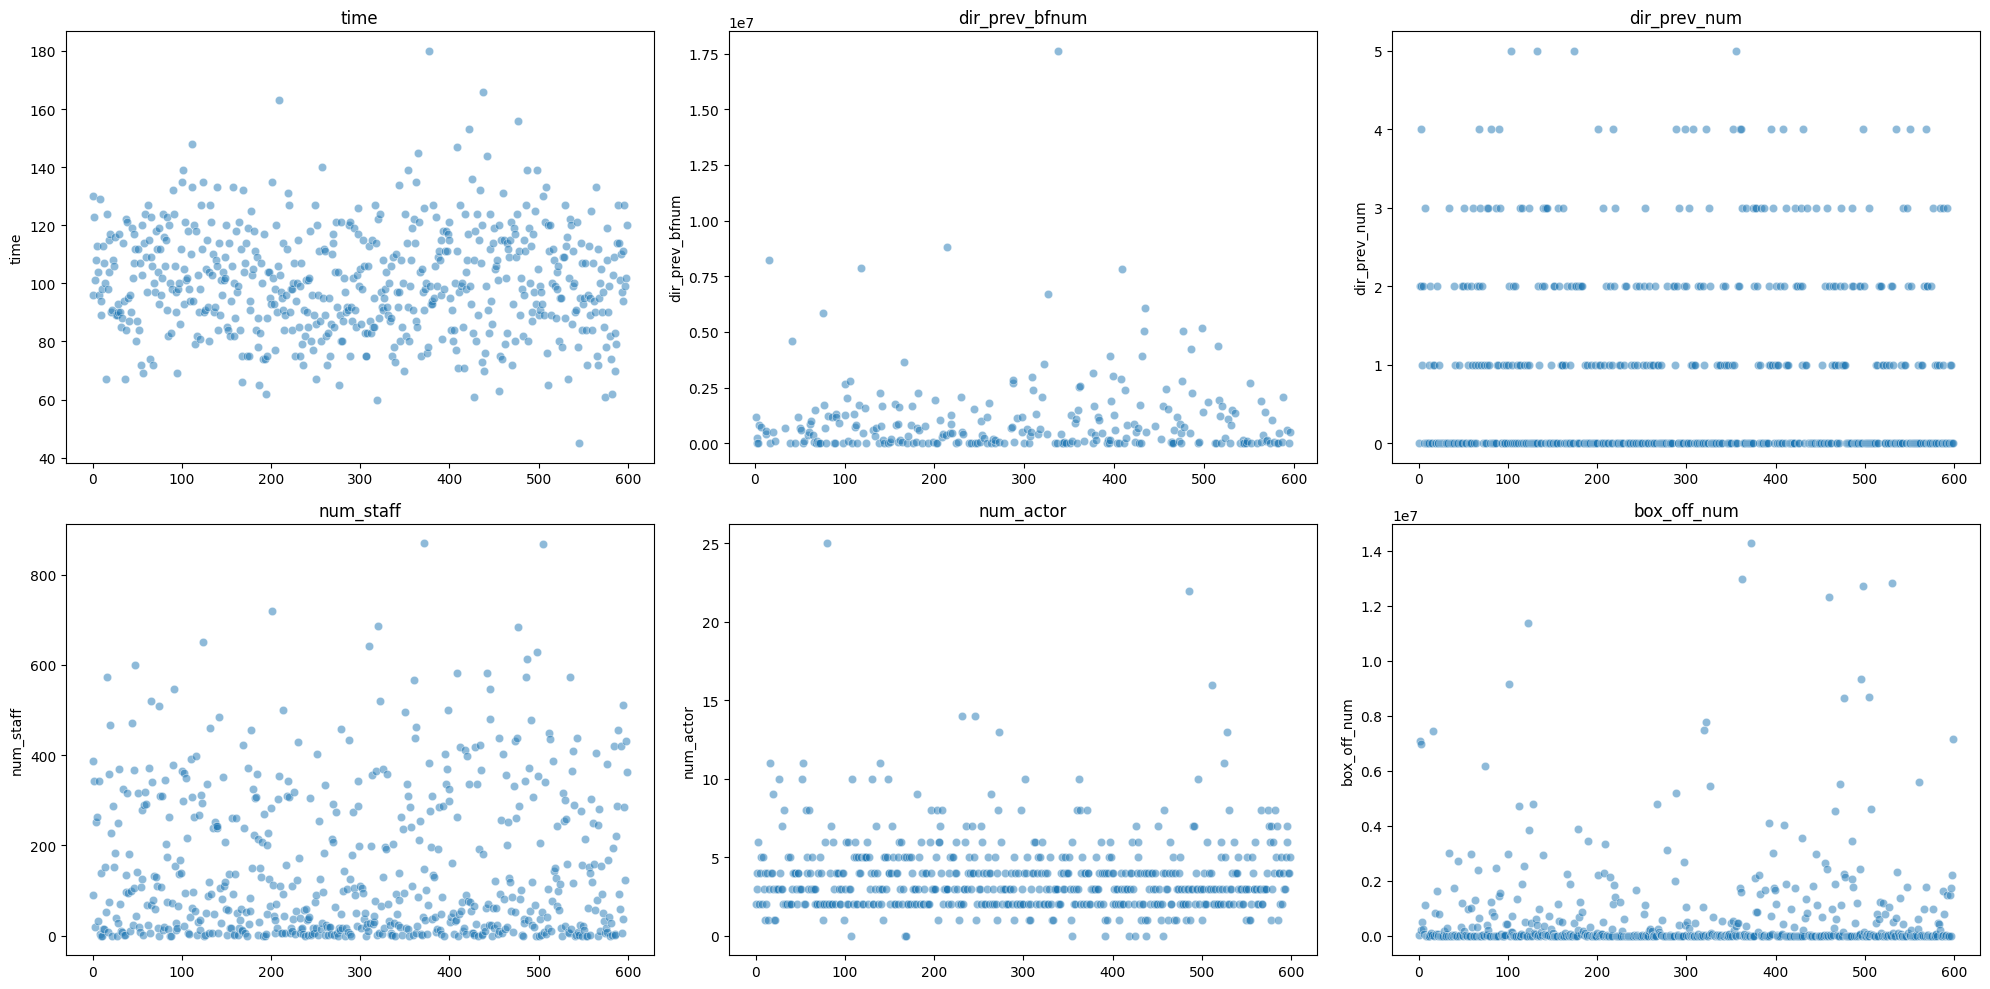

In [19]:
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 산점도 생성
cols_i = train_copy.select_dtypes(exclude='O')
for i, col in enumerate(cols_i.columns):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=cols_i[col], alpha=0.5)  # scatterplot 사용
    plt.title(col)

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


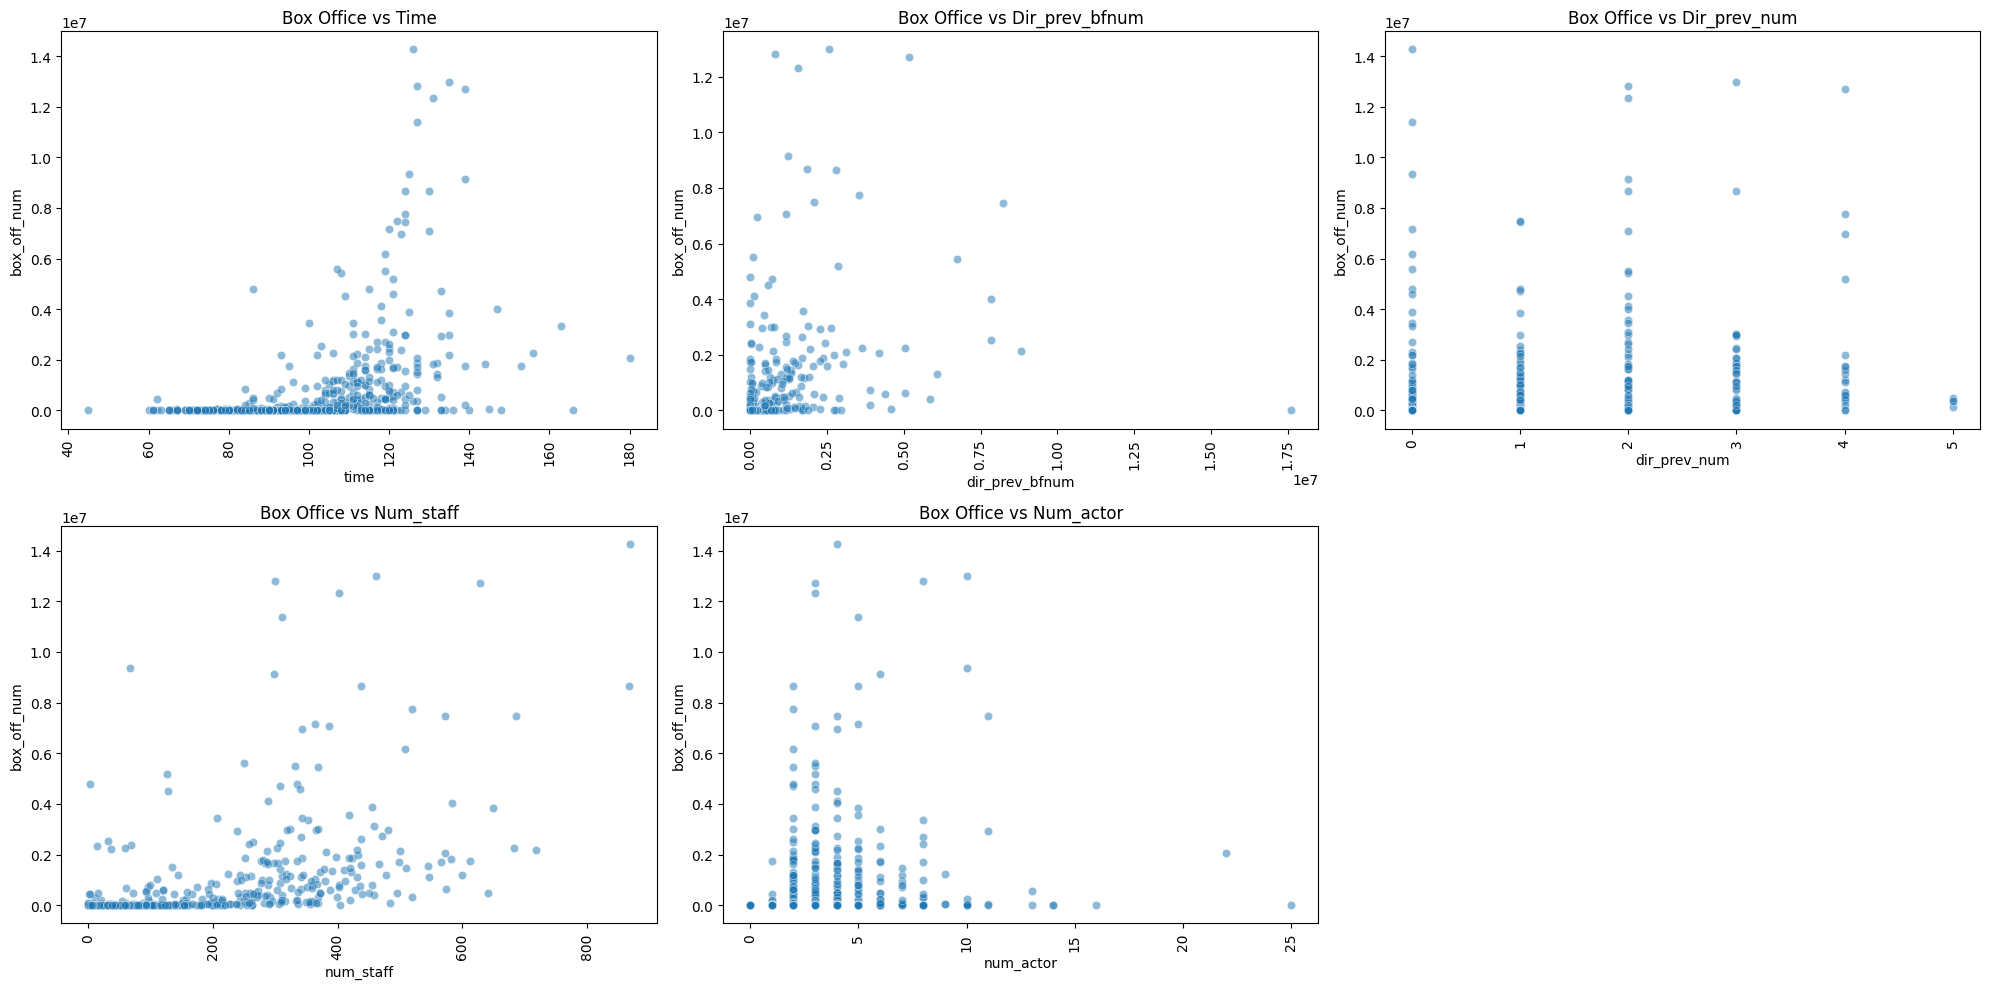

In [20]:
X_copy = cols_o.drop('box_off_num',axis=1)

# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

for i, col in enumerate(X_copy.columns):
    plt.subplot(2, 3, i + 1)  # n행 n열로 서브플롯 생성
    sns.scatterplot(x=X_copy[col], y=train_copy['box_off_num'], alpha=0.5)
    plt.title(f'Box Office vs {col.capitalize()}')
    plt.xticks(rotation=90)  # x축 레이블 회전

# 그래프 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [21]:
col_o = train_copy.select_dtypes(include=['object']).copy()

In [22]:
col_i = train_copy.select_dtypes(include=['int']).copy()

히스토그램

In [23]:
col_o = train_copy.select_dtypes(include='O')
col_o.nunique()

,0
distributor,169
genre,12
release_time,330
screening_rat,4
director,472


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (31.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and direc

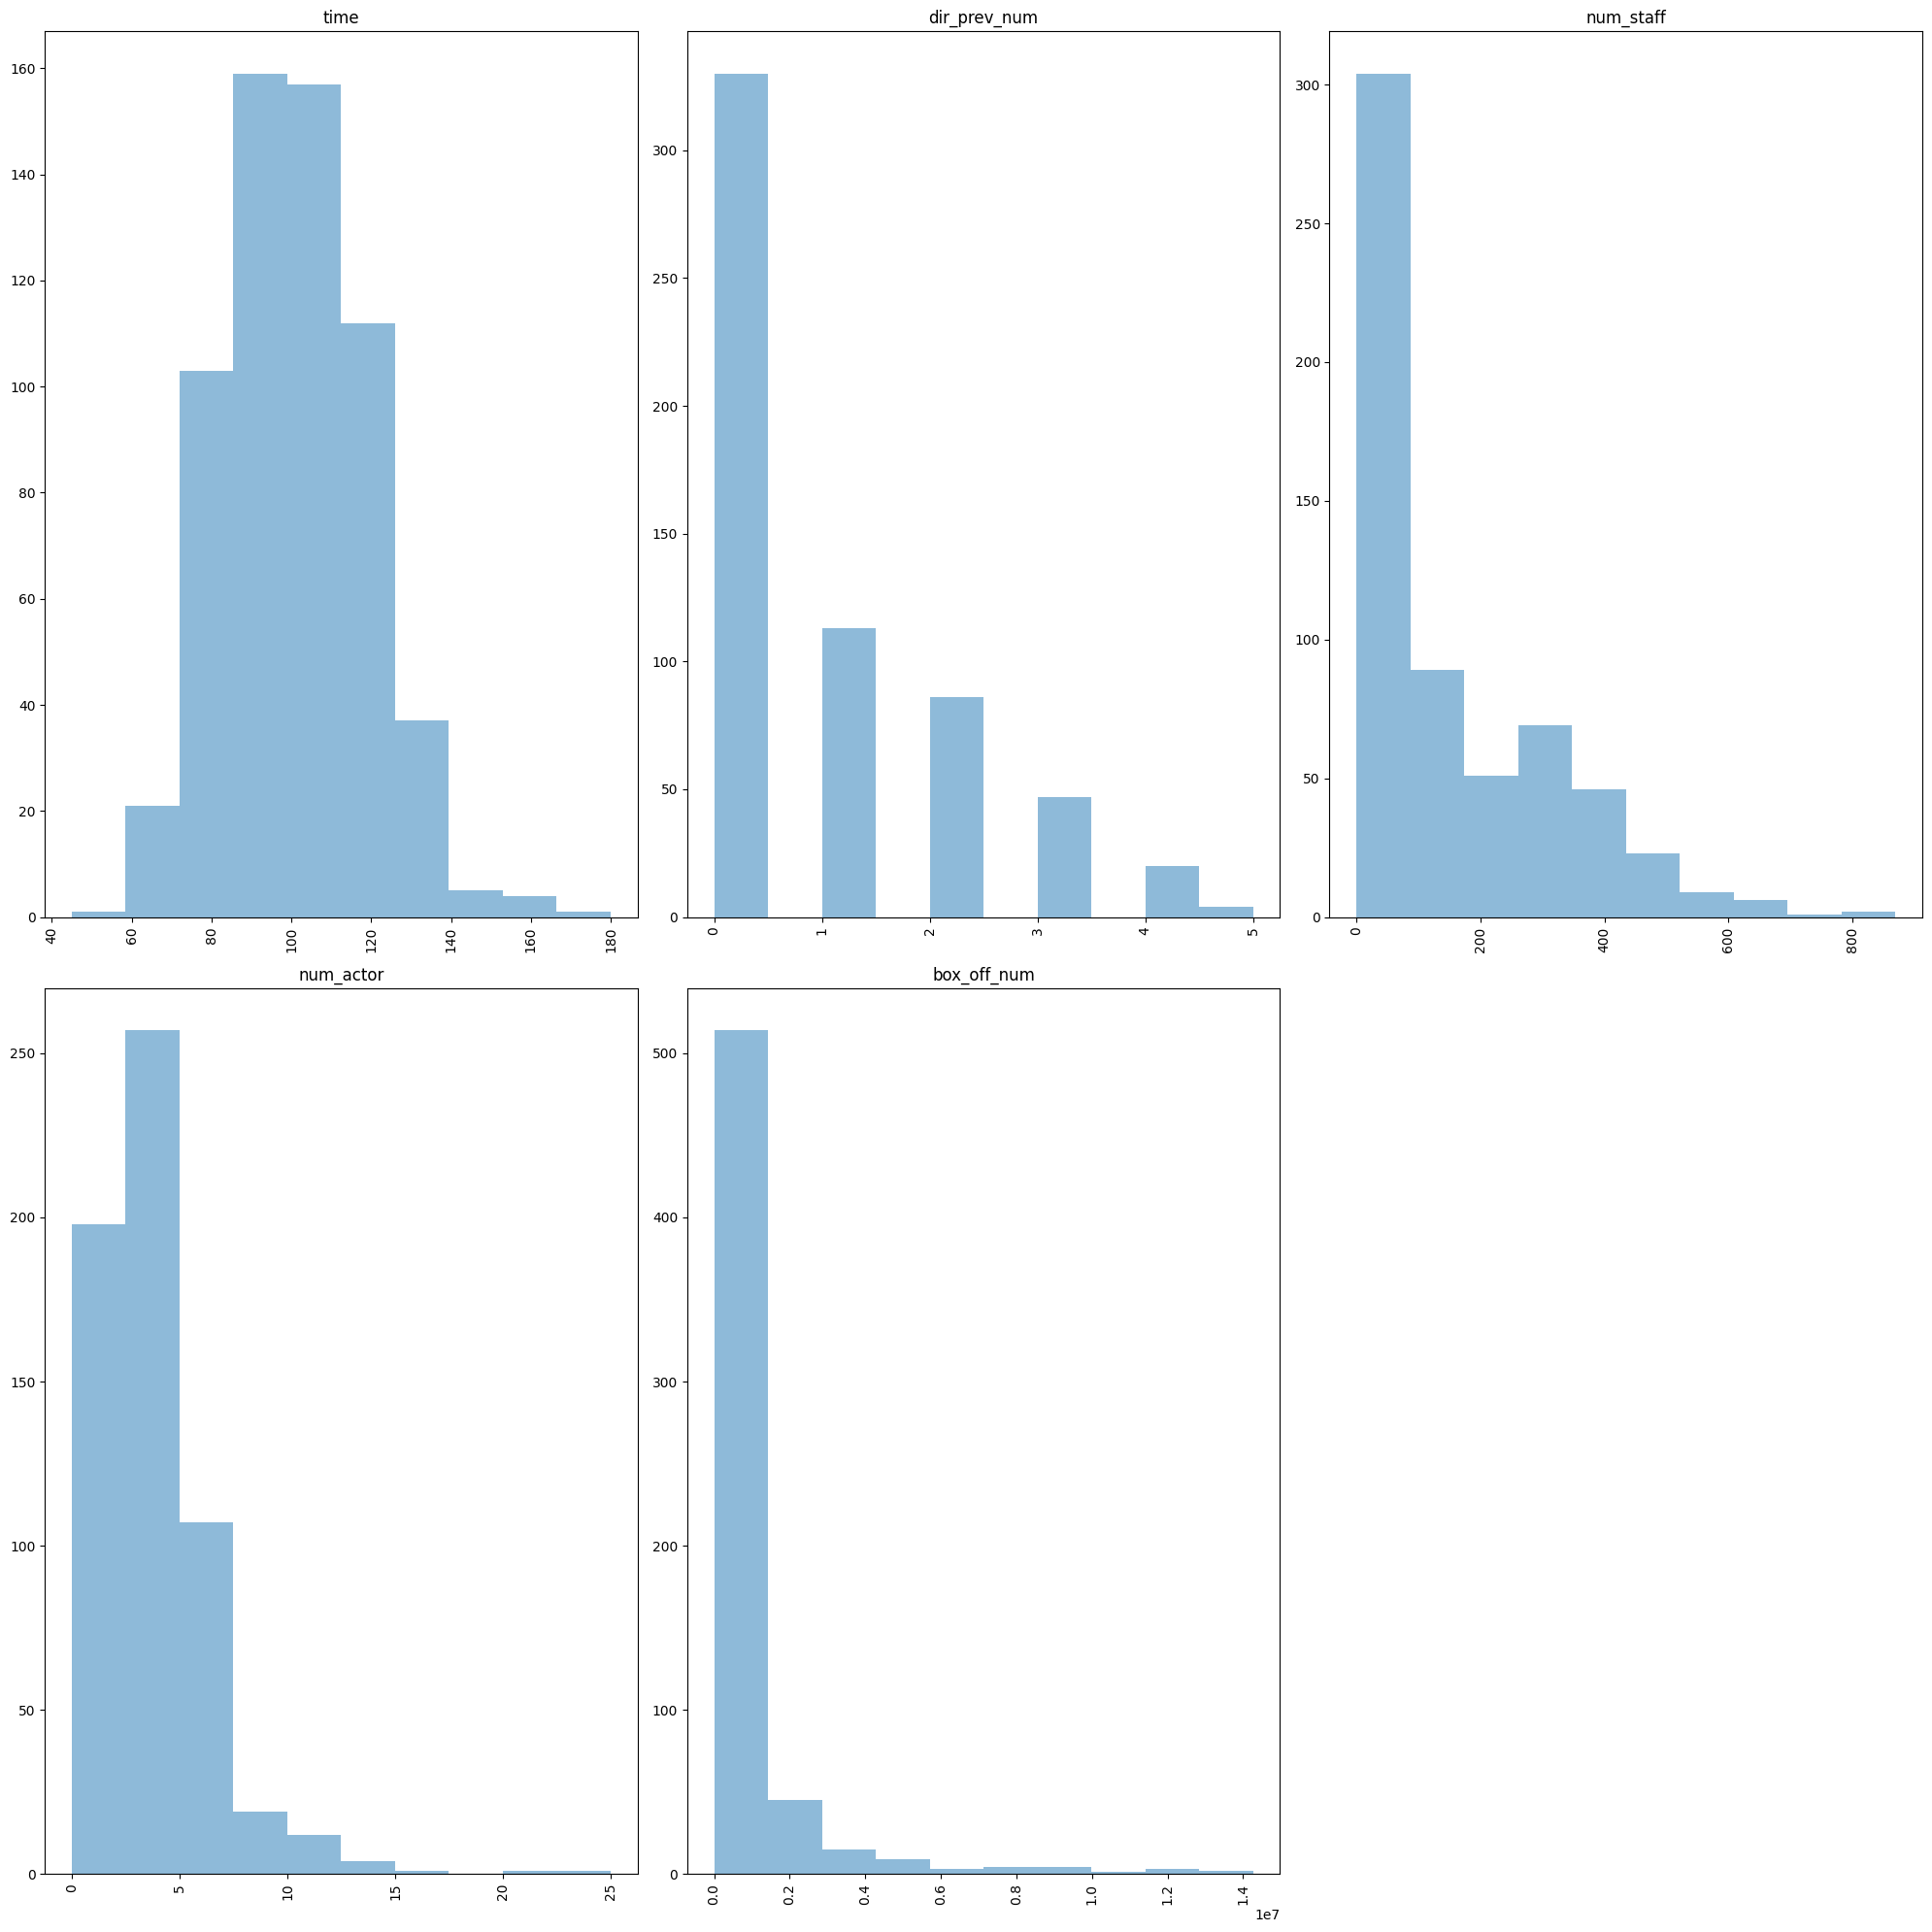

In [25]:
plt.figure(figsize=(20, 20))

# 각 컬럼에 대한 히스토그램 생성
for i, col in enumerate(col_i.columns):
    plt.subplot(2,3, i + 1)
    plt.hist(col_i[col], bins=10, alpha=0.5)
    plt.title(col)
    plt.xticks(rotation=90)  # x축 레이블을 90도 회전

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  plt.tight_layout()
<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  plt.tight_layout()
<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  plt.tight_layout()
<ipython-input-26-bd756c234647>:16: UserWarning: Glyph 539

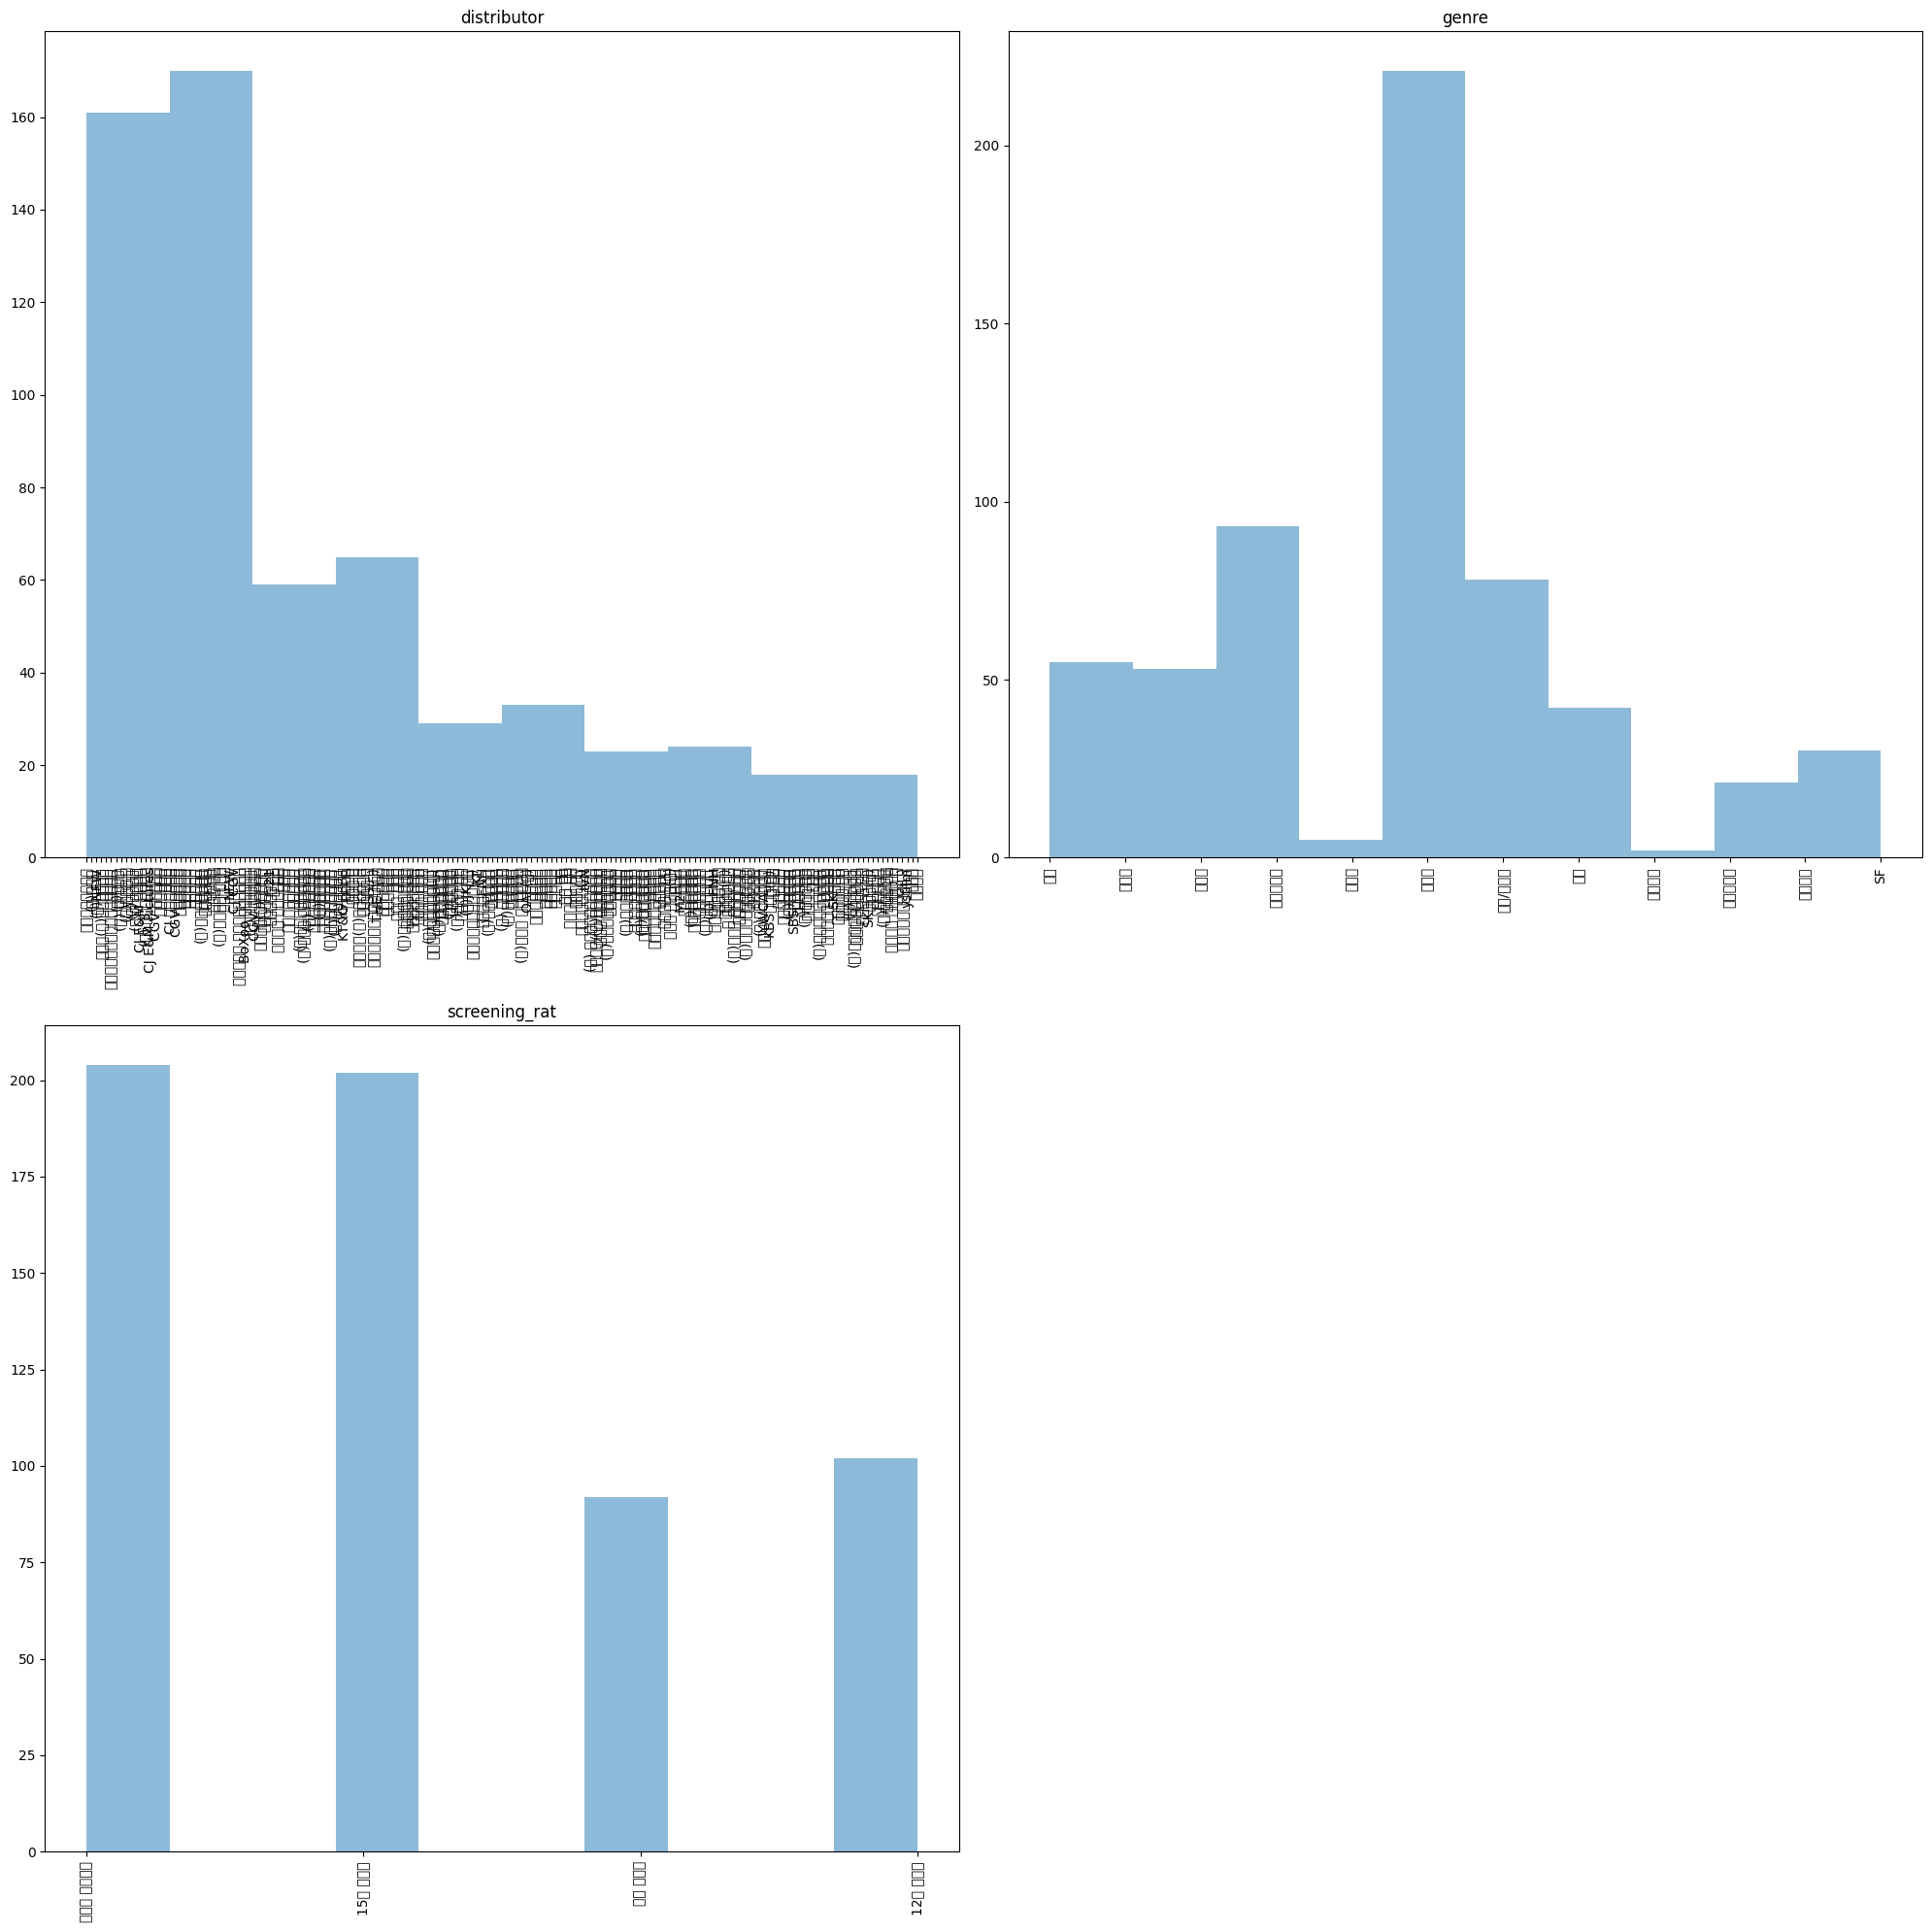

In [26]:
train_n = train_copy[['distributor','genre','screening_rat']]

plt.rc('font', family='NanumBarunGothic')

# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 20))

# 각 컬럼에 대한 히스토그램 생성
for i, col in enumerate(train_n.columns):
    plt.subplot(2,2, i + 1)
    plt.hist(train_n[col], bins=10, alpha=0.5)
    plt.title(col)
    plt.xticks(rotation=90)  # x축 레이블을 90도 회전

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


박스 플롯

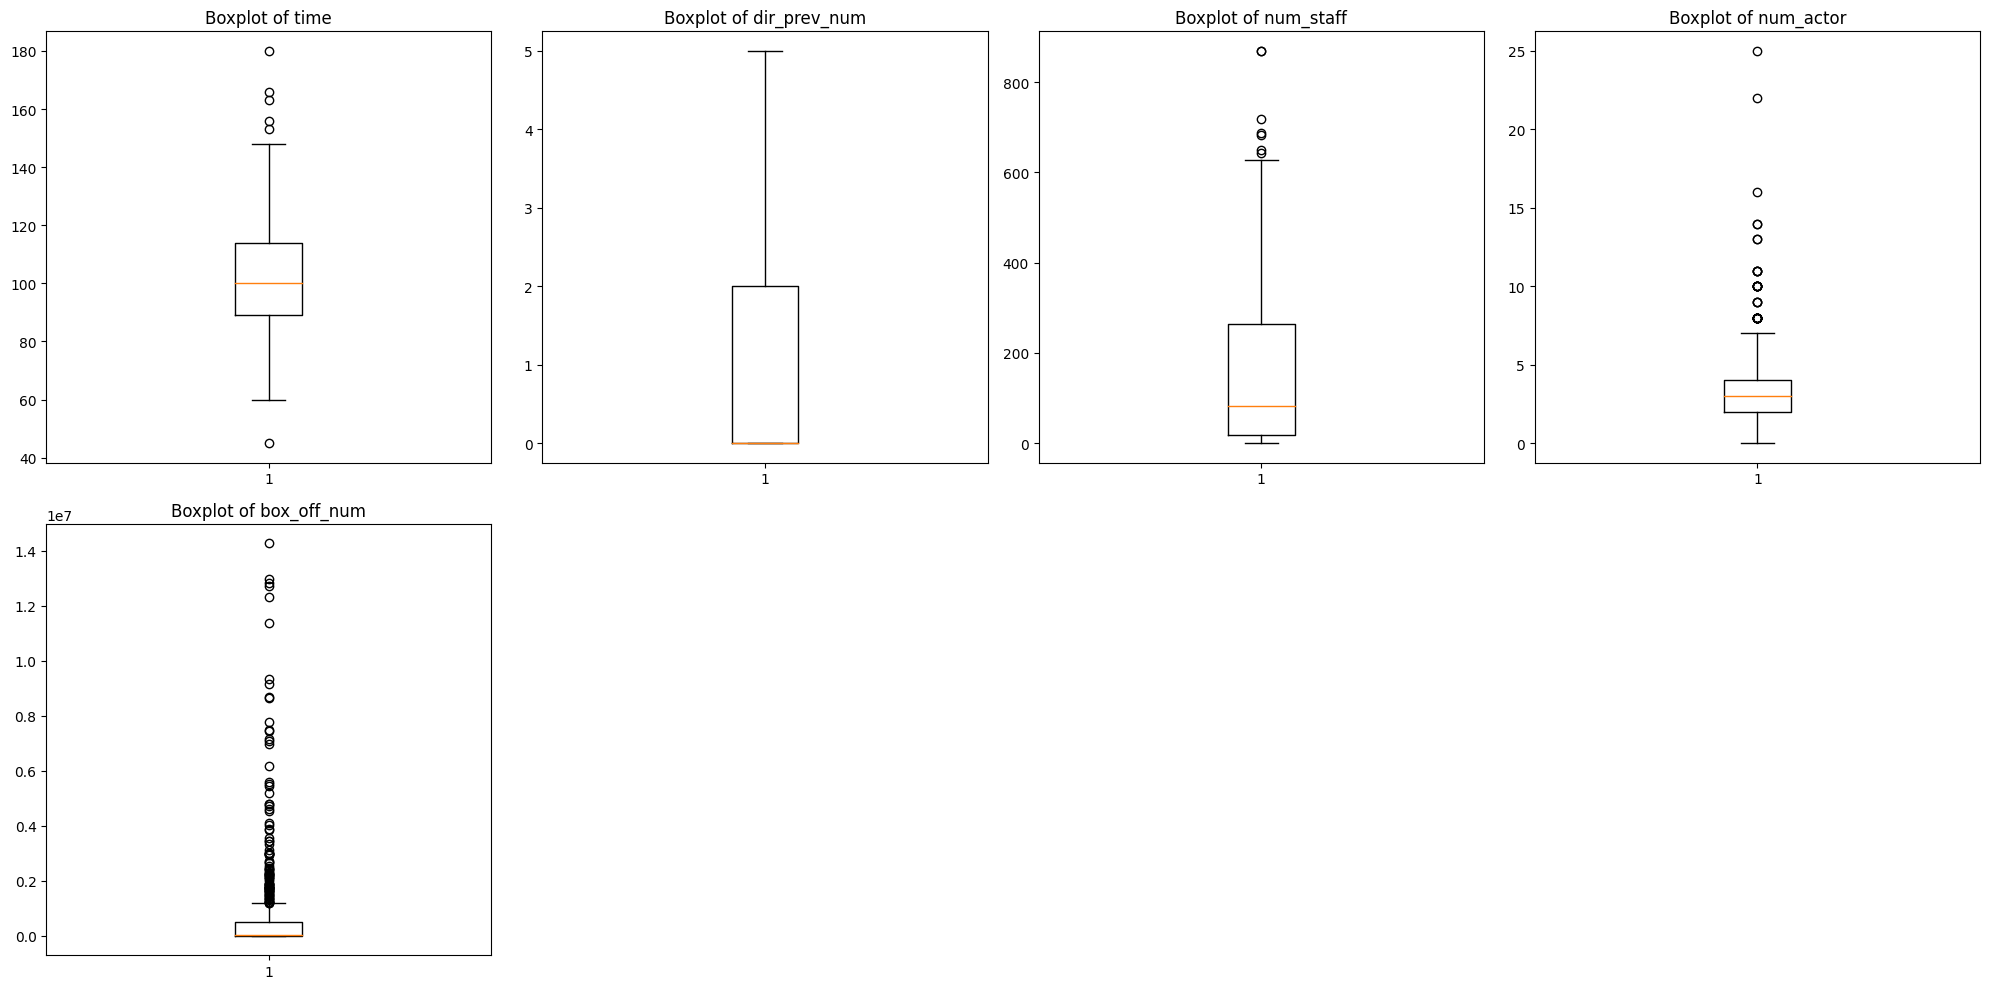

In [27]:
# 결측 치 처리후 실행
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(col_i.columns):
    plt.subplot(2,4, i + 1)
    plt.boxplot(col_i[col])
    plt.title(f'Boxplot of {col}')
    # plt.set_xlabel('Column')
    # plt.set_ylabel('Value')

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/se

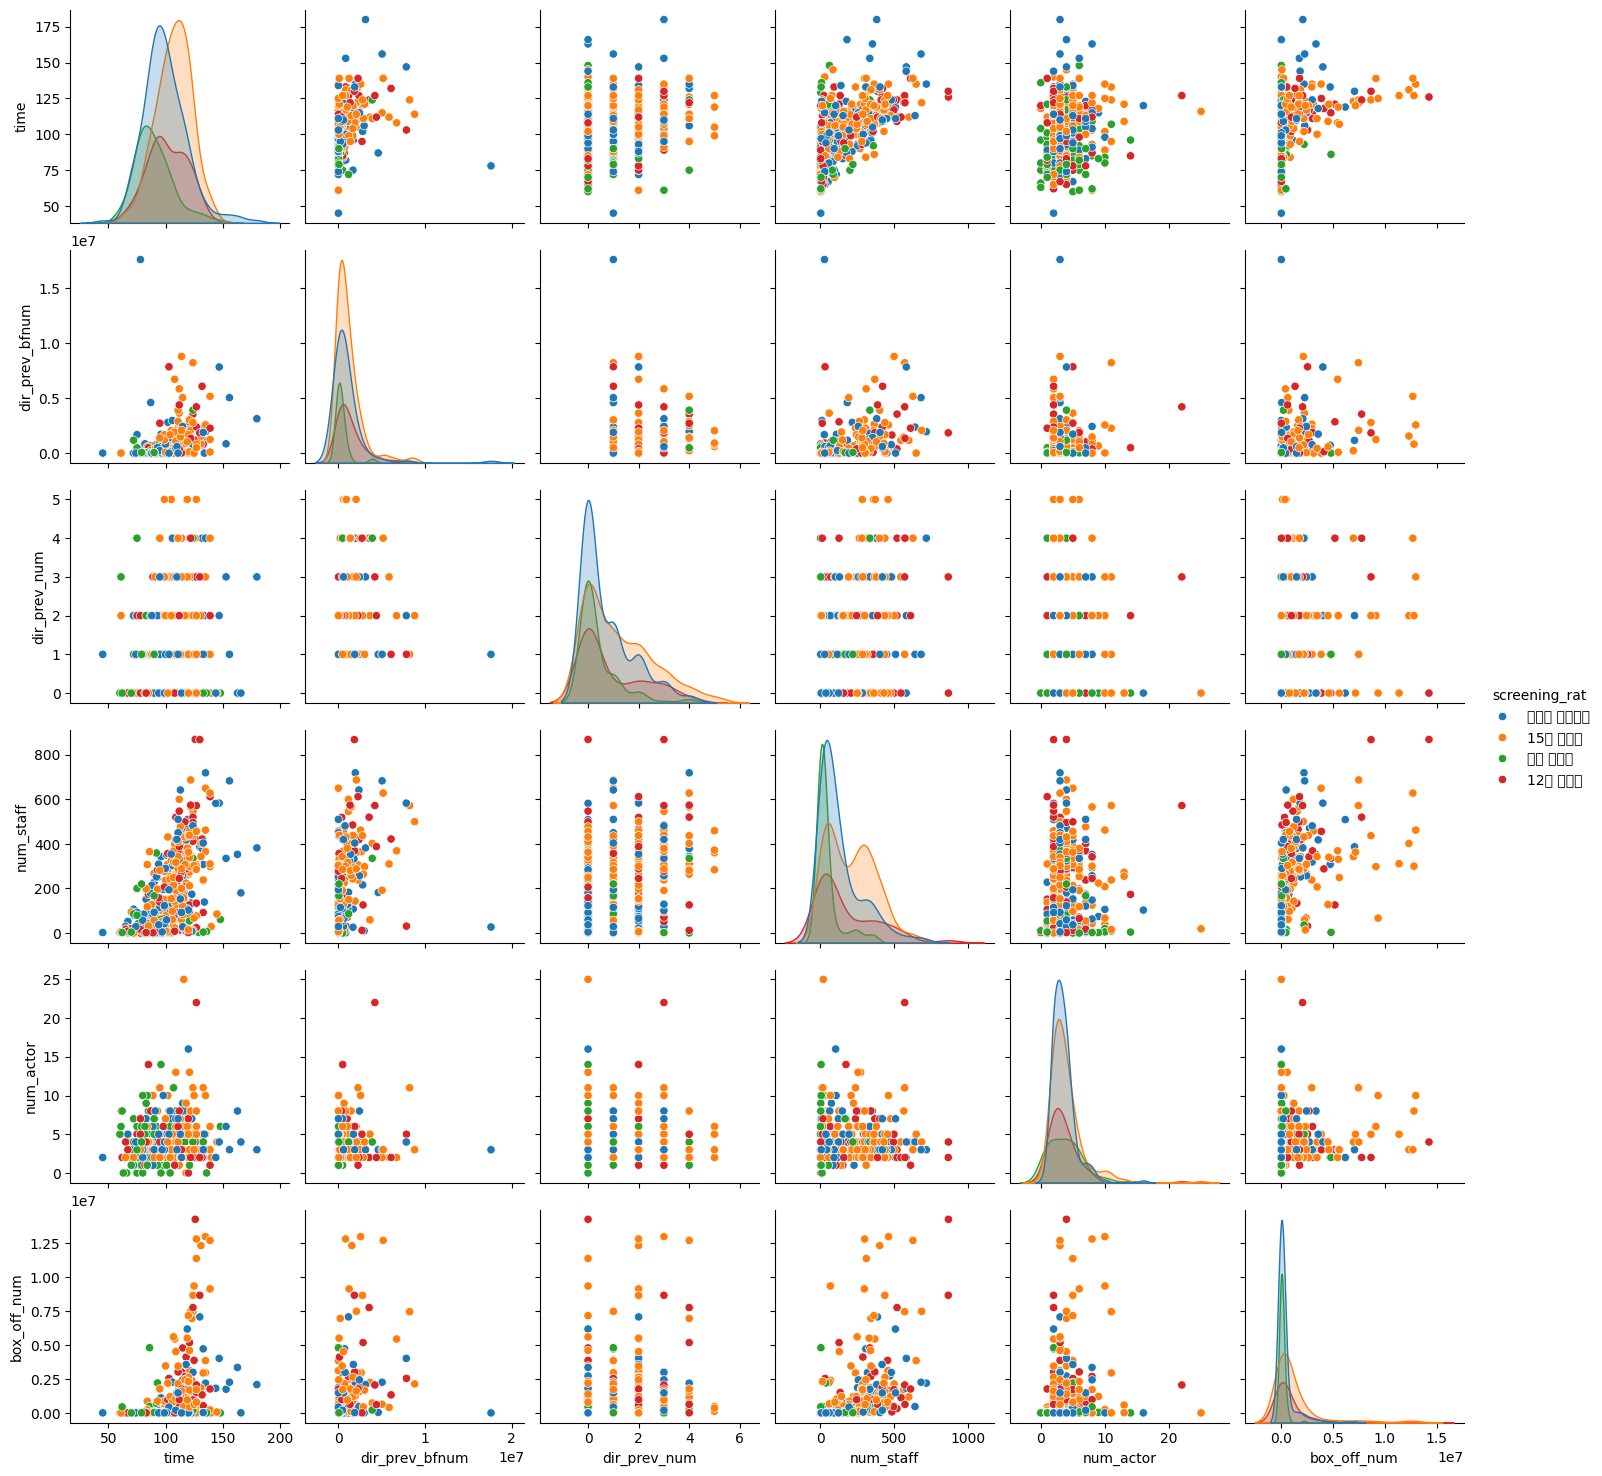

In [28]:
g = sns.pairplot(train, hue="screening_rat")

#### 데이터 전처리

distributor에 대해 비슷한 내용 처리


In [29]:
def distr_cleaning (x) :
    if 'CGV' in x or '무비꼴라쥬' in x :
        return 'CGV'
    elif 'E&M' in x or 'CJ엔터테인먼트' in x :
        return 'CJ E&M'
    elif '롯데' in x :
        return '롯데엔터테인먼트'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '마운틴픽처스' in x or '마운틴픽쳐스' in x :
        return '마운틴픽쳐스'
    elif '메가박스중앙플러스엠' in x or '메가박스플러스엠' in x :
        return '메가박스플러스엠'
    elif '쇼박스' in x :
        return '쇼박스'
    elif '조이앤시네마' in x or '조이앤컨텐츠그룹' in x :
        return '조이앤'
    elif '타임스토리' in x :
        return '타임스토리'
    elif '프리비젼' in x :
        return '프리비젼'
    elif '리틀빅픽' in x :
        return '리틀빅픽쳐스'
    else :
        return x

In [30]:
train_copy['distributor'] = train_copy['distributor'].apply(distr_cleaning)
print(train['distributor'].nunique())
train_copy['distributor'].nunique()

169


156

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

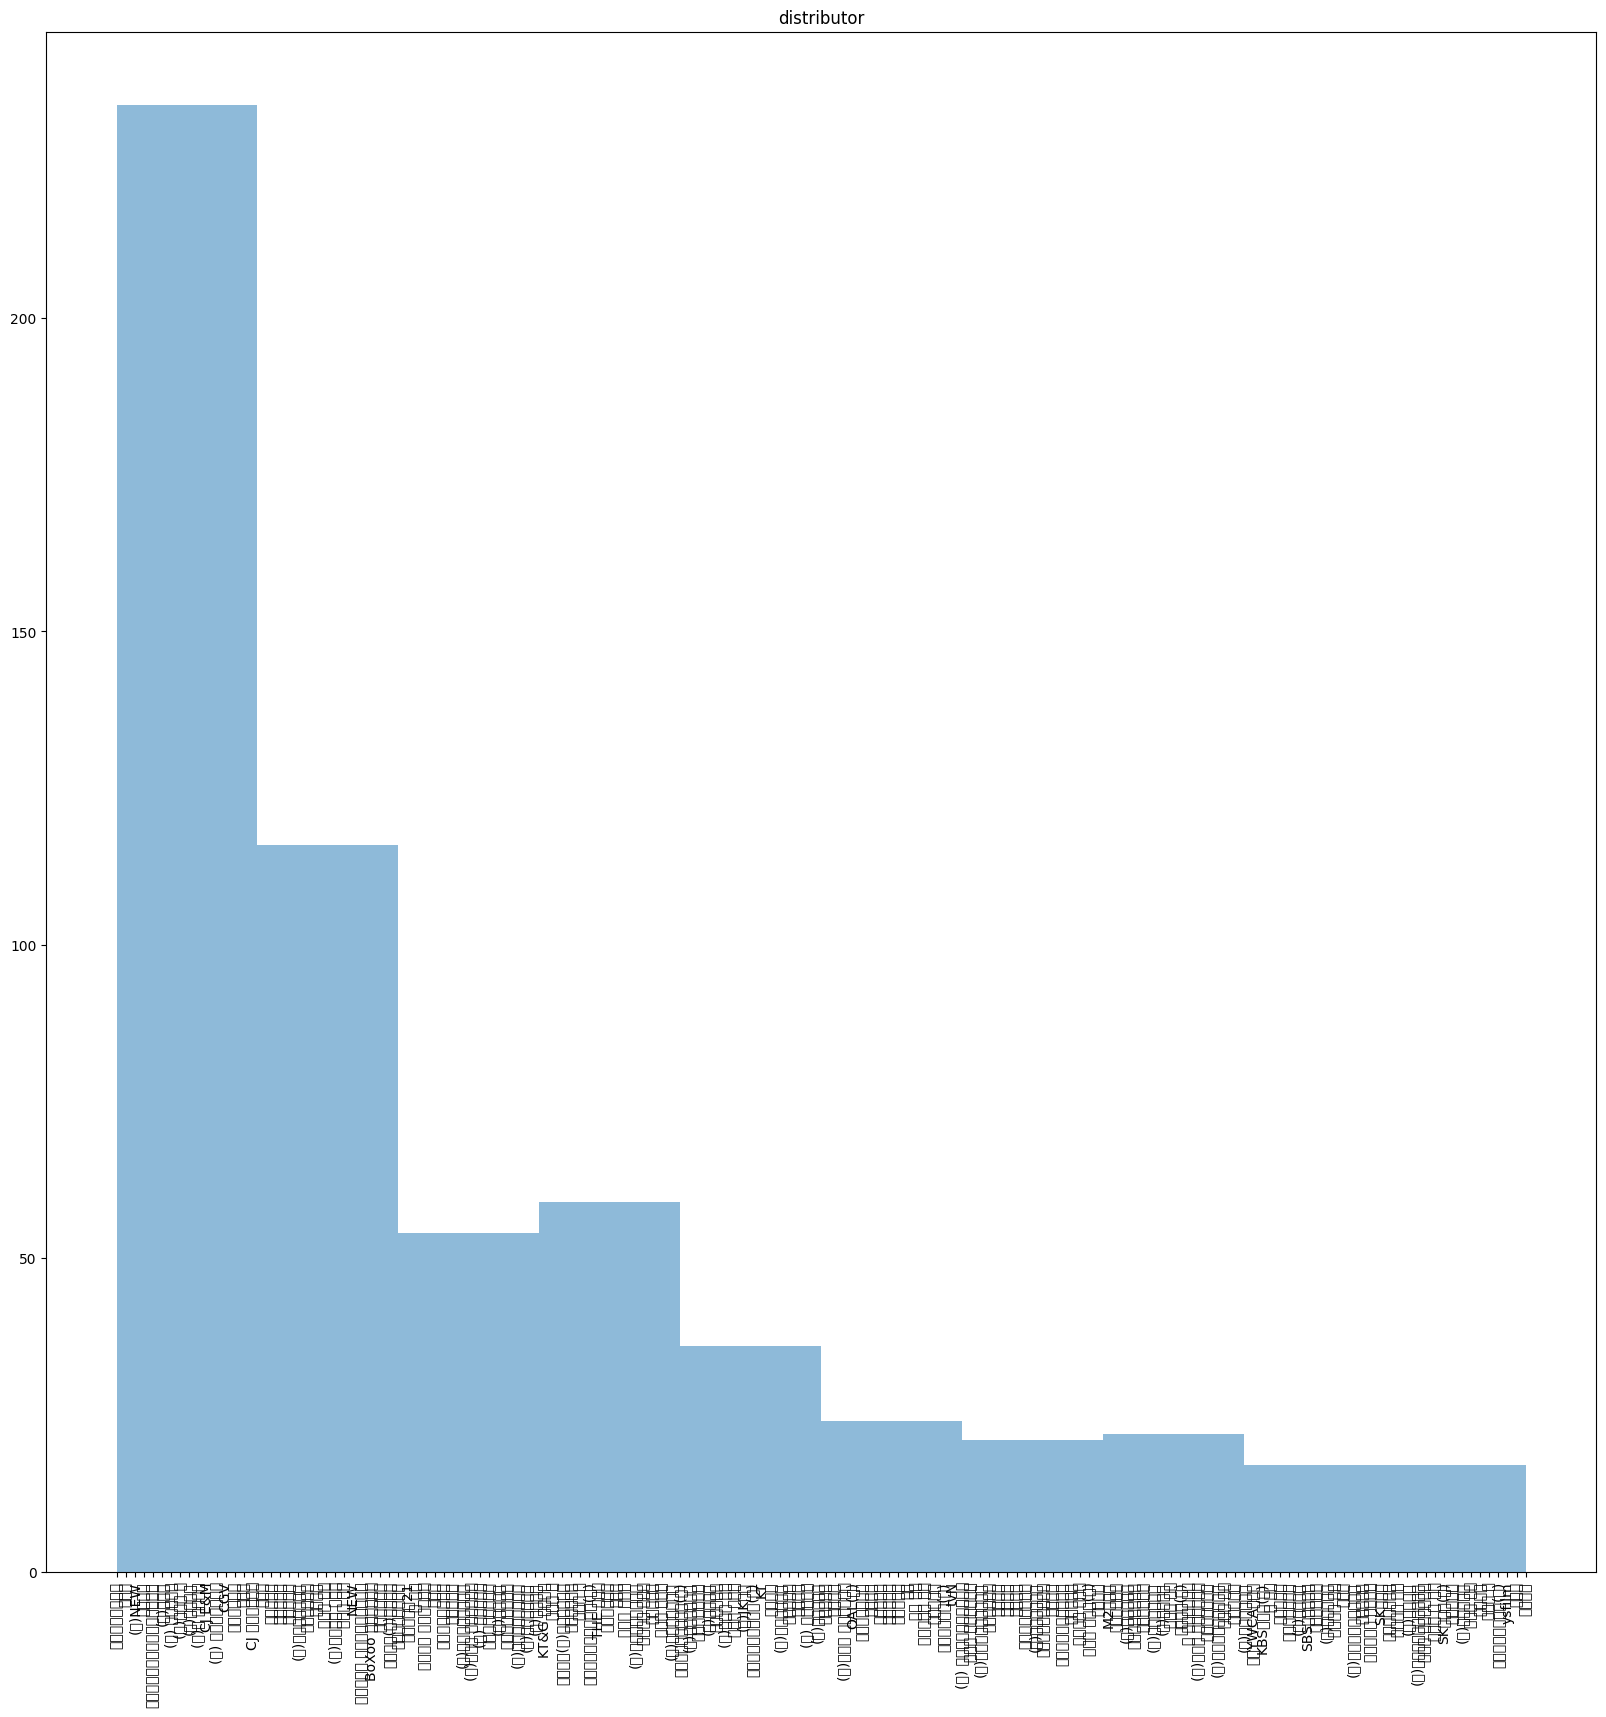

In [31]:
plt.figure(figsize=(20, 20))

plt.hist(train_copy['distributor'], alpha=0.5)
plt.title('distributor')
plt.xticks(rotation=90)
plt.show();

**결측값 처리**

dir_prev_bfnum :해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

In [32]:
train.isnull().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [33]:
test.isnull().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,136
dir_prev_num,0
num_staff,0


* 결측값 채우기


fillna()

In [34]:
train_fill = train.fillna(0)
test_fill = test.fillna(0)

* 결측값 컬럼 삭제

In [35]:
train_d = train.drop('dir_prev_bfnum',axis=1)
test_d = test.drop('dir_prev_bfnum',axis=1)

* Iterative Imputer

In [36]:
# 결측값 처리
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer를 사용하기 위해 필요
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
train_im = train.copy()
test_im = test.copy()
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)

# 'dir_prev_bfnum' 칼럼의 결측값 처리 (2차원 배열로 변환 필요)
train_im['dir_prev_bfnum'] = imputer.fit_transform(train_im['dir_prev_bfnum'].values.reshape(-1, 1))

# test 데이터에 같은 Imputer 적용 (train 데이터를 학습한 imputer를 사용하여 test 데이터 변환)
test_im['dir_prev_bfnum'] = imputer.transform(test_im['dir_prev_bfnum'].values.reshape(-1, 1))

**KNN Imputer**

KNN Imputer는 결측값을 채우는 방법 중 하나로, K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘을 기반으로 결측값을 처리합니다. 이 방법은 결측값이 있는 샘플과 가장 가까운 K개의 이웃 데이터를 찾아, 그 이웃의 값을 이용해 결측값을 대체합니다. 특히, 데이터 피처 간의 상관관계를 반영하기 때문에 비선형적이거나 복잡한 관계를 가진 데이터에서도 효과적으로 사용될 수 있습니다.

**장점**

* 상관관계 반영: KNN Imputation은 다른 피처들과의 상관관계를 반영하여 결측값을 대체합니다. 즉, 결측값이 있는 데이터와 비슷한 값을 가진 이웃의 데이터를 사용하므로, 패턴을 유지할 수 있습니다.
* 비선형 관계에 적합: KNN은 비선형 관계를 잘 반영하기 때문에 데이터의 관계가 복잡하거나 비선형적일 때 더 효과적입니다.
* 다양한 데이터 타입 지원: 범주형, 연속형 변수 모두에서 사용 가능하며, 특정 피처에 대해서는 더 나은 성능을 발휘할 수 있습니다.

**단점**

* 계산 비용: K값이 커지거나 데이터셋이 클수록 이웃을 계산하는 데 시간이 많이 소요됩니다. 특히, 대규모 데이터에서는 성능 문제가 발생할 수 있습니다.
* 특성별 이웃 정의 어려움: 데이터가 스케일이 다를 경우(예: 한 피처는 값이 큰데 다른 피처는 작은 경우), KNN Imputer는 데이터의 스케일링이나 정규화를 먼저 필요로 합니다.
* 과적합 위험: 결측값을 이웃의 값으로 대체하는 과정에서 실제 데이터 분포를 왜곡할 수 있습니다.

In [37]:
from sklearn.impute import KNNImputer

# 데이터 복사
train_knn = train.copy()
test_knn = test.copy()

# KNN Imputer 생성 (이웃 K=5로 설정, 필요에 따라 n_neighbors 값 조정 가능)
imputer = KNNImputer(n_neighbors=5)

# 'dir_prev_bfnum' 칼럼의 결측값 처리 (2차원 배열로 변환 필요)
train_knn['dir_prev_bfnum'] = imputer.fit_transform(train_knn['dir_prev_bfnum'].values.reshape(-1, 1))

# test 데이터에 같은 Imputer 적용 (train 데이터를 학습한 imputer를 사용하여 test 데이터 변환)
test_knn['dir_prev_bfnum'] = imputer.transform(test_knn['dir_prev_bfnum'].values.reshape(-1, 1))


**선형 보간 (Linear Interpolation)**

**장점**
* 간단하고 빠름: 선형 보간법은 계산이 매우 간단하고 빠르게 적용할 수 있습니다. 특히, 시간 시계열 데이터에서 결측값 처리를 매우 쉽게 수행할 수 있습니다.
* 연속 데이터에 적합: 데이터가 시간 순서나 다른 순서에 따라 연속적인 경향을 가질 때, 매우 적합한 방법입니다. 데이터의 자연스러운 흐름을 잘 반영합니다.
* 다양한 보간 방법 지원: 단순 선형 외에도 다양한 보간 기법(예: 다항식, 스플라인)을 사용할 수 있어, 데이터의 특성에 맞는 보간법을 선택할 수 있습니다.

**단점**
* 비선형 데이터에 부적합: 데이터가 비선형적이거나 갑작스러운 변화가 있는 경우, 선형 보간은 부정확한 결과를 초래할 수 있습니다. 직선 경향만 반영하기 때문에 복잡한 데이터 패턴은 고려하지 못합니다.
* 시계열 외 데이터에 부적합: 주로 시간적 흐름이 있는 연속형 데이터에서 효과적이며, 시계열이 아닌 경우 그 효용이 제한적입니다.
* 멀티플 변수 처리 어려움: 여러 개의 피처가 있는 데이터셋에서 결측값을 처리할 때는 사용하기 어렵습니다. 보통 1차원 데이터에 적합한 기법입니다.


In [38]:
train_l = train.copy()
test_l = test.copy()

# 'dir_prev_bfnum' 칼럼의 결측값 처리 (선형 보간)
train_l['dir_prev_bfnum'] = train_l['dir_prev_bfnum'].interpolate(method='linear')

# test 데이터에 같은 방법 적용
train_l['dir_prev_bfnum'] = train_l['dir_prev_bfnum'].interpolate(method='linear')


title 컬럼 삭제

In [39]:
train = train.drop('title',axis=1)
test_title = test.pop('title')

결측값

In [40]:
# 결측값 처리
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer를 사용하기 위해 필요
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
# 숫자형 데이터만 선택
num_cols_train = train.select_dtypes(exclude='O').columns
num_cols_test = test.select_dtypes(exclude='O').columns

# train과 test에 모두 있는 열만 선택
common_cols = num_cols_train.intersection(num_cols_test)

# 결측값 처리
train[common_cols] = imputer.fit_transform(train[common_cols])
test[common_cols] = imputer.transform(test[common_cols])

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   release_time    600 non-null    object 
 3   time            600 non-null    float64
 4   screening_rat   600 non-null    object 
 5   director        600 non-null    object 
 6   dir_prev_bfnum  600 non-null    float64
 7   dir_prev_num    600 non-null    float64
 8   num_staff       600 non-null    float64
 9   num_actor       600 non-null    float64
 10  box_off_num     600 non-null    int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 51.7+ KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     243 non-null    object 
 1   genre           243 non-null    object 
 2   release_time    243 non-null    object 
 3   time            243 non-null    float64
 4   screening_rat   243 non-null    object 
 5   director        243 non-null    object 
 6   dir_prev_bfnum  243 non-null    float64
 7   dir_prev_num    243 non-null    float64
 8   num_staff       243 non-null    float64
 9   num_actor       243 non-null    float64
dtypes: float64(5), object(5)
memory usage: 19.1+ KB


target 값

In [43]:
target = train.pop('box_off_num')

train 데이터와 test데이터 합치기

In [44]:
train.shape, test.shape

((600, 10), (243, 10))

In [45]:
df = pd.concat([train,test])
df.shape

(843, 10)

In [46]:
df['release_time'] = pd.to_datetime(df['release_time'])

In [47]:
df['year'] = df['release_time'].dt.year
df['month'] = df['release_time'].dt.month
df['day'] = df['release_time'].dt.day
df['day_name'] = df['release_time'].dt.day_name()


In [48]:
df['release_time'].value_counts()

,count
release_time,
2015-08-13,8
2015-10-22,8
2013-11-28,7
2015-09-10,7
2015-12-10,7
...,...
2013-04-03,1
2013-09-11,1
2012-09-27,1


In [51]:
df['day_name'].value_counts()

,count
day_name,
Thursday,675
Wednesday,156
Monday,4
Tuesday,4
Friday,2
Saturday,1
Sunday,1


주말 여부

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['day_name'] = le.fit_transform(df['day_name'])


Label Encoding

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [55]:
from sklearn.preprocessing import LabelEncoder
cols = df.select_dtypes(include='O').columns
for col in cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])


시간 데이터

In [ ]:
df.head()

In [66]:
df = df.drop('release_time',axis=1)

데이터 나누기

In [67]:
train = df.iloc[:600]
test = df.iloc[600:]
train.shape, test.shape

((600, 13), (243, 13))

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    int64  
 1   genre           600 non-null    int64  
 2   time            600 non-null    float64
 3   screening_rat   600 non-null    int64  
 4   director        600 non-null    int64  
 5   dir_prev_bfnum  600 non-null    float64
 6   dir_prev_num    600 non-null    float64
 7   num_staff       600 non-null    float64
 8   num_actor       600 non-null    float64
 9   year            600 non-null    int32  
 10  month           600 non-null    int32  
 11  day             600 non-null    int32  
 12  day_name        600 non-null    int64  
dtypes: float64(5), int32(3), int64(5)
memory usage: 58.6 KB


정규화


In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


훈련데이터 테스트 데이터 분류

In [70]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train,target, test_size=0.3, random_state=110)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((420, 13), (180, 13), (420,), (180,))

#### 모형 학습 및 평가

라이브러리

In [71]:
from sklearn.metrics import mean_squared_error
def rmse(y_val,pred):
    return mean_squared_error(y_val,pred)**0.5

선형 회귀

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr,y_tr)
pred = lr.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  1726915.9218729585


로지스틱회귀

In [73]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_tr,y_tr)
pred = log.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  6649337.199360011


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


결정트리

In [74]:
#DecisionTreeRegression
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_impurity_decrease=0.0)
dtc.fit(X_tr, y_tr)
pred = dtc.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  2251551.8462489047


배깅

In [75]:
# Bagging
from sklearn.ensemble import BaggingRegressor
base_model = DecisionTreeRegressor()
bag = BaggingRegressor(estimator=base_model,
                          n_estimators=300,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=2024)
bag.fit(X_tr,y_tr)

pred = bag.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  1661025.121519195


RandomForest

In [76]:
# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_tr,y_tr)
pred = rf.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  1640577.594351126


AdaBoost

In [77]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100, random_state=2024)
ada.fit(X_tr,y_tr)
pred = ada.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  2041578.1864259706


GredientBoosting

In [78]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_tr,y_tr)

pred = gb.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  1836909.6741898297


XGBoost

In [79]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50, subsample=1.0, learning_rate=0.1, max_depth=6, n_jobs=-1, random_state=2024)
xgb.fit(X_tr,y_tr)

pred = xgb.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

RMSE 값:  1968727.9848912186


lightGBM

In [80]:
# LightGBM
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_tr,y_tr)

pred = lgbm.predict(X_val)
print('RMSE 값: ',rmse(y_val,pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 13
[LightGBM] [Info] Start training from score 644768.178571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai